[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/PO_II/blob/main/3_CaminhoMin/Dijkistra_nx.ipynb)

## **Pesquisa Operacional II**

**Prof. Diogo Ferreira de Lima Silva (TEP-UFF)**

Autores do notebook: 
- Rodrigo Celso de Lima Porto
- Diogo Ferreira de Lima Silva

# PROBLEMA DO CAMINHO MÍNIMO


O Problema do Caminho Mínimo (<i>Shortest Path Problem</i>) consiste em encontrar o caminho mais curto existente entre dois vertices de um grafo.

Partimos de um vértice origem $s$ e chegamos em uma vértice destino $t$. O nosso grafo é ponderado, onde cada aresta possui um custo $w_{ij}$ associado (exemplo: custo de viajar do vértice $i$ para o vértice $j$).

Caso não exista uma aresta para um dado par de vértices, considera-se $w_{ij}=\infty$. Um exemplo prático deste problema consiste em encontrar a menor rota possível entre duas cidades. 

---
# INSTÂNCIA DO PROBLEMA
---

Exemplo retirado em: [Aula 16 - Caminho Mínimo ou Rota Mais Curta](https://www.youtube.com/watch?v=i5C82JDEMko)

Um fornecedor de embalagens localizado em Osasco entrega seus produtos semanalmente para uma fábrica de refrigerantes localizada na região da Vila Formosa, em São Paulo. Para efetuar esta tarefa, o motorista pode optar por escolher diversos caminhos, passando por diferentes bairros em São Paulo. A Figura a seguir apresenta os possíveis caminhos que o veículo pode percorrer, do nó de oferta (Osasco) para o nó ou bairros. Formule o problema que mostre qual será o caminho mais curto a ser percorrido.

<center> 
<img src="CaminhoMin1.png" width="800" /> 
</center>



---
---
# RESOLVENDO COM NETWORKX
---
---

<p align=justify>
&emsp; A biblioteca NetworkX conta com as funções <a href='https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html#networkx.algorithms.shortest_paths.generic.shortest_path'><code>shortest_path()</code></a> e <a href='https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html'><code>shortest_path_length</code></a> para executar o algoritmo de Dijkistra e encontrar o caminho mínimo dentro de um grafo e o valor do seu comprimento, respectivamente. Para isso, é necessário construir o grafo do problema antes de executar o algoritmo.
</p>

In [1]:
import networkx as nx

# Instanciando um grafo direcionado
G = nx.DiGraph()

# Criando os nós a partir de uma lista
G.add_nodes_from([
    (1, {'cidade': 'Osasco'}),
    (2, {'cidade': 'Lapa'}),
    (3, {'cidade': 'Alto de Pinheiros'}),
    (4, {'cidade': 'Santa Cecília'}),
    (5, {'cidade': 'Jardim Paulista'}),
    (6, {'cidade': 'Belém'}),
    (7, {'cidade': 'Mooca'}),
    (8, {'cidade': 'Ipiranga'}),
    (9, {'cidade': 'Vila Formosa'})
])

# Criando as arestas a partir de uma lista
# Foi definido um atributo 'distância' para cada aresta
G.add_edges_from([
    (1,  2, {'distância': 11}),
    (1,  3, {'distância':  9}),
    (2,  4, {'distância':  4}),
    (2,  5, {'distância':  8}),
    (3,  4, {'distância':  8}),
    (3,  5, {'distância':  6}),
    (4,  6, {'distância':  6}),
    (4,  7, {'distância':  5}),
    (5,  7, {'distância':  6}),
    (5,  8, {'distância':  4}),
    (6,  9, {'distância':  6}),
    (7,  9, {'distância':  4}),
    (8,  9, {'distância':  6})
])

# Calcula o Caminho Mínimo e retorna uma lista de nós
nos_cm = nx.shortest_path(
    G,
    source= 1,
    target= 9,
    weight= 'distância',
    method= 'dijkstra'
    )

# Calcula o comprimento do Caminho Mínimo
comprimento_cm = nx.shortest_path_length(
    G,
    source= 1,
    target= 9,
    weight= 'distância',
    method= 'dijkstra'
    )

In [3]:
print(f'O caminho encontrado foi {nos_cm}')
print(f'O tamanho do caminho é {comprimento_cm}')

O caminho encontrado foi [1, 2, 4, 7, 9]
O tamanho do caminho é 24


---
## Desenhando o grafo
---

Vamos desenhar nosso grafo. Inicialmente, é necessário criar e guardar as posições dos nós em uma variável. Para isso foi utilizado a função <a href='https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.planar_layout.html'><code>planar_layout()</code></a>.

Logo depois, seguimos para a aplicação da função <a href='https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx'><code>draw_networkx()</code></a> para desenhar os grafos.


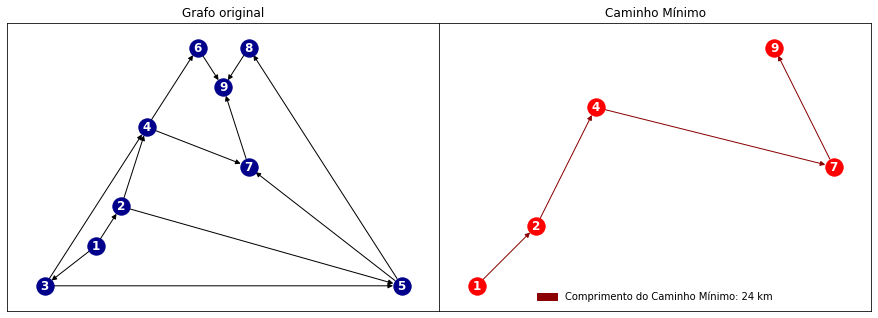

In [ ]:
import matplotlib.pyplot as plt

# Define o layout dos nós do grafo G para exibição
layout = nx.planar_layout(G)

# Desenhando o grafo original
nx.draw_networkx(
    G,                                # Grafo original
    ax=          plt.axes([0,0,1,1]), # Define o eixo de exibição
    pos=         layout,              # Define o layout dos nós         
    with_labels= True,                # Os nós terão rótulos para exibir os seus nomes
    node_color=  'darkblue',          # Define a cor dos nós como azul escuro
    node_size=   300,                 # Define o tamanho dos nós
    node_shape=  'o',                 # Define o formato dos nós como círculo
    font_weight= 'bold',              # Coloca negrito no texto dos nomes dos nós
    font_color=  'white'              # Define a cor do texto dos nomes como branco
    )
plt.title('Grafo original') # Define o título do 1º grafo

# Criando um lista das arestas para posterior exibição
arestas_cm = []
for i in range(len(nos_cm)-1):
  no1 = nos_cm[i]
  no2 = nos_cm[i+1]
  arestas_cm.append((no1, no2))

# Desenhando o Caminho Mínimo
nx.draw_networkx(
    G,                                # Grafo original
    nodelist=    nos_cm,              # Exibe apenas os nós armazenados em nos_cm 
    edgelist=    arestas_cm,          # Exibe apenas as arestas armazenadas em arestas_cm
    ax=          plt.axes([1,0,1,1]), # Define o eixo de exibição
    pos=         layout,              # Define o layout dos nós         
    with_labels= True,                # Os nós terão rótulos para exibir os seus nomes
    node_color=  'red',               # Define a cor dos nós como vermelho
    edge_color=  'darkred',           # Define a cor das arestas como vermelho escuro
    node_size=   300,                 # Define o tamanho dos nós
    node_shape=  'o',                 # Define o formato dos nós como círculo
    font_weight= 'bold',              # Coloca negrito no texto dos nomes dos nós
    font_color=  'white'              # Define a cor do texto dos nomes como branco
    )
plt.title('Caminho Mínimo') # Define o título do 2º grafo
plt.legend(
    labels=     [f"Comprimento do Caminho Mínimo: {comprimento_cm} km"],
    loc=        'lower center',
    framealpha= 0
    )

---
# EXERCÍCIO DE FIXAÇÃO
---

Fonte: TAHA, Hamdy A. <b>Operations Research: An Introduction</b>. 10ª edição. Exercício 6-14, pág. 292.

A figura a seguir fornece a rede de comunicação entre duas estações, 1 e 7. A probabilidade de um link na rede operar sem falhas é mostrada em cada arco. As mensagens são enviadas da estação 1 para a estação 7, e o objetivo é determinar a rota que maximiza a probabilidade de uma transmissão bem-sucedida. Formule a situação como um modelo de Caminho Mínimo e determine a solução ótima.




<center> <img src="CaminhoMin2.png" width="800" /> </center>




### (a) Resolva utilizando NetworkX

In [ ]:
import networkx as nx



### (b) Apresente os grafos com Matplotlib

In [ ]:
import matplotlib.pyplot as plt

